### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

In [91]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats


df = pd.read_csv('./stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In this experient the independent variable is the item shown to the individual (a color/meaning congruent or incongruent word). The dependent variable in this setting is the reaction time of an individual.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis in this situation would state that we don't expect a statistically significant difference on reaction time if an individual is shown a missmatch in word and color.
    
The alternative hypothesis, which we would like to prove to be true, would suggest that there is a significant difference in average reaction time if a missmatch in word and color is shown to the participants.


$$H_{0}: \mu_{congruent} = \mu_{incongruent} $$

$$H_{1}: \mu_{congruent} \neq \mu_{incongruent} $$

*where $\mu$ is the mean reaction time

(2)b: A statistical test is proposed which will distinguish the proposed hypotheses. Any assumptions made by the statistical test are addressed.

In the following analaysis a paired t-test will be applied. The paired t-test will be applied because it compares the mean of two related observations and if they statistically significant differ from each other. Even more this test can be applied with relatively small sample sizes (24 in our case).




(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [60]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [81]:
print('the median of the congruent goup is', df.median()[0], 'the median of the incongruent group is', df.median()[0])

the median of the congruent goup is 14.3565 the median of the incongruent group is 14.3565


In [62]:
print('the standard deviation for the data set is \n', np.std(df))

the standard deviation for the data set is 
 Congruent      3.484416
Incongruent    4.696055
dtype: float64


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

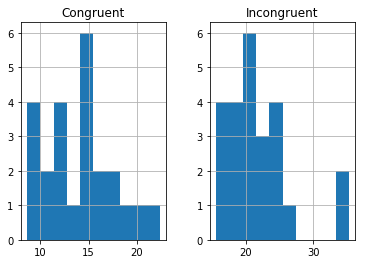

In [63]:
df.hist();

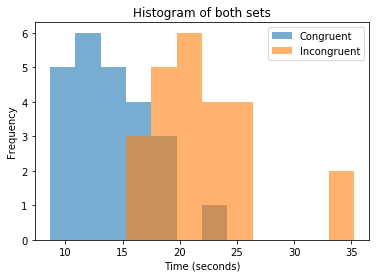

In [87]:
#https://github.com/thrabchak/Udacity-Data-Analysis/blob/master/P1%20Stroop%20Effect/Data_Analyst_ND_Project1.ipynb
df.plot(kind='hist', alpha=0.6, bins=12, title='Histogram of both sets');
xlabel = plt.xlabel('Time (seconds)')

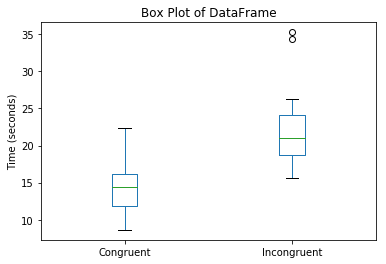

In [65]:
title = 'Box plot of dataframe'
df.plot(title='Box Plot of DataFrame', kind='box')
ylabel = plt.ylabel('Time (seconds)')

The first plot indicates visualy that the reaction time of the incongruent group is longer compared to the congruent group. This seems even more evident in the 2nd plot, which also indicates that the incongruent dataset contains 2 outliers close to 35 seconds. This is also well visible on the box plot and can be obsorved in the higher standard deviation of the incongruent group.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

Assumptions: The confidence level of 95%, thus type 1 error rate of max. 5%. 

In [88]:
#https://github.com/thrabchak/Udacity-Data-Analysis/blob/master/P1%20Stroop%20Effect/Data_Analyst_ND_Project1.ipynb
# Perform the statistical test here
# Perform calculations for t test
ttestResults = stats.ttest_rel(df.Congruent, df.Incongruent)
tstatistic = ttestResults[0]
pvalue = ttestResults[1]
print("t-value = " + '%.2f' % tstatistic)
print("p-value = " + '%.8f' % pvalue)


t-value = -8.02
p-value = 0.00000004


Our analysis indicates that there is a statistic significant difference on the average time spend on the exercice between the congruent and incongruent test group. Since our p-value is lower than our trashhold of 0.05, we reject the null hypothesis. Thus, our test indicates that there is statistical evidence in the duration of solving the task depending on the group.
    
 The statistical analysis confirms the same as the visual anlysis in chapter 4.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!